In [1]:
%reload_ext autoreload
%autoreload 2

# Redes Neuronales Convolucionales (CNN)

![cnn.jpeg](imgs/cnn.jpeg)

- La meta es reducir el ancho/alto y aumentar la profundidad
- Transformar información espacial en features (feature maps)

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import YouTubeVideo

# Videos

## Intro CNNs:

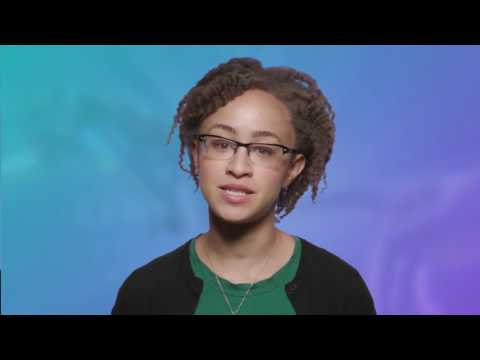

In [3]:
YouTubeVideo('HrYNL_1SV2Y')

## Capas convolucionales

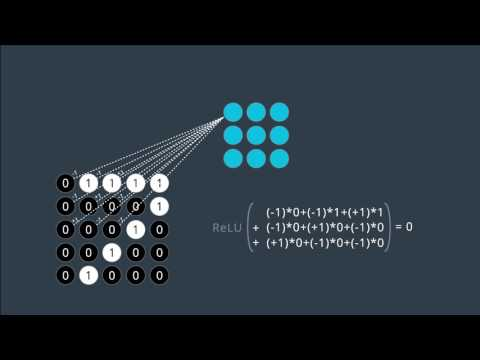

In [4]:
YouTubeVideo('h5R_JvdUrUI')

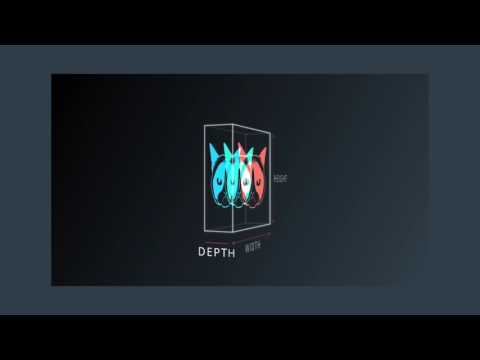

In [5]:
YouTubeVideo('RnM1D-XI--8')

## Capas pooling

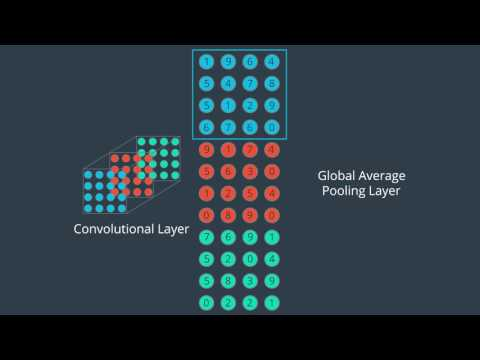

In [6]:
YouTubeVideo('OkkIZNs7Cyc')

## CNN en clasificación de imágenes

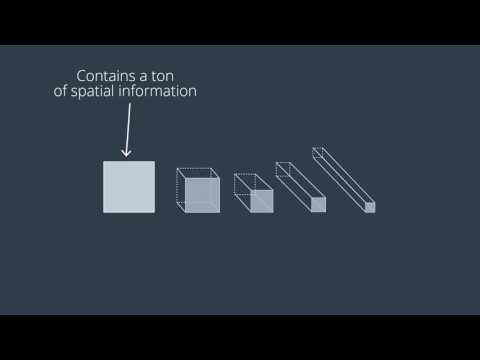

In [7]:
YouTubeVideo('l9vg_1YUlzg')

# Capas en las CNNs

## Capa convolucional:
**Su función es aumentar la profundidad (espacialidad --> features)**
![convolve.png](imgs/convolve.png)
- [Ver Ejemplo Auto](https://github.com/udacity/aind2-cnn/blob/master/conv-visualization/conv_visualization.ipynb)

### Hyperparámetros
- Para aumentar la dimensionalidad de una CNN: Aumento la **cantidad de filtros**
- Para incrementar el tamaño/complejidad de los patrones detectados: Aumento el **tamaño del filtro**
- **Stride**: Paso. Determina el tamaño de las salidas del siguiente nivel
- **Padding**: ¿Qué hacemos con los bordes? 'same': mantiene la dimensión de la entrada; 'valid': no padding

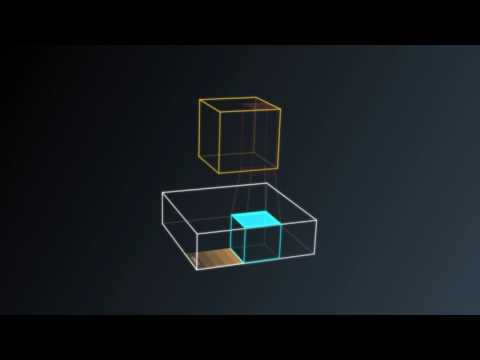

In [8]:
YouTubeVideo('Qt5SQNcQfgo')

### Como usamos esto en [keras](https://keras.io/layers/convolutional/)?

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D

2024-08-20 15:40:49.353458: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
model = Sequential()
model.add(Dense(100, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

/Users/julian/opt/anaconda3/envs/cnns/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(
    optimizer='Adam',
    metrics=['accuracy'],
    loss='categorical_crossentropy'
)

In [13]:
3*3*64*128 + 128

73856

In [14]:
model = Sequential()
model.add(Convolution2D(filters=32, strides=2, kernel_size=5, padding='same',
                        activation='relu',
                        input_shape=(2*640, 2*480, 3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='valid'))
model.add(Convolution2D(filters=64, strides=2, kernel_size=3, padding='same',
                        activation='relu',
                        ))
model.add(Convolution2D(filters=128, strides=2, kernel_size=3, padding='same',
                        activation='relu',
                        ))
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same'))
model.add(Convolution2D(filters=256, strides=2, kernel_size=3, padding='same',
                        activation='relu',
                        ))
model.add(Convolution2D(filters=512, strides=2, kernel_size=3, padding='same',
                        activation='relu',
                        ))
model.add(Convolution2D(filters=1024, strides=1, kernel_size=3, padding='same',
                        activation='relu',
                        ))

# model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

/Users/julian/opt/anaconda3/envs/cnns/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 640, 480, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 320, 240, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 160, 120, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 80, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 40, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 8, 512)     │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 8, 1024)    │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │       102,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,393,238 (24.39 MB)

 Trainable params: 6,393,238 (24.39 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
3*5*5*32 + 32

2432

Hacer pruebas y explicar 'Output Shape' y 'Param #':
- filters=1, strides=1, kernel_size=1, padding='same'
- filters=16, strides=1, kernel_size=1, padding='same'
- filters=1, strides=1, kernel_size=4, padding='same'
- filters=10, strides=1, kernel_size=4, padding='same'
- filters=1, strides=2, kernel_size=5, padding='same'
- filters=1, strides=2, kernel_size=5, padding='valid'
- filters=16, strides=2, kernel_size=5, padding='same'
- filters=16, strides=4, kernel_size=4, padding='same', input_shape=(32,32,1)
- filters=16, strides=4, kernel_size=4, padding='same', input_shape=(32,32,3)

### Convolucionales vs Densas

Mirar cantidad de **parámetros** y **Output Shape**

Las CNN Reducen la cantidad de **parámetros** y la **cantidad de conexiones**

Si hago una analogía con una capa densa, ¿cuántas neuronas tengo a la salida en una CNN?
- Multiplico las dimensiones del output-shape

Supongamos una capa densa de 1250 neuronas con una entrada de una imagen de 28x28x1. ¿Cuántas conexiones tengo y cuántos parámetros?
- 784x1250 = 980.000 conexiones
- 784x1250 + 1250 = 981.250 parámetros

In [16]:
model = Sequential()
model.add(Dense(1250, input_shape=(None,784)))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, None, 1250)     │       981,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 981,250 (3.74 MB)

 Trainable params: 981,250 (3.74 MB)

 Non-trainable params: 0 (0.00 B)

Para una capa **convolucional** con la misma entrada y la misma cantidad de neuronas a la salida?
- Claramente depende del tamaño del kernel

In [17]:
model = Sequential()
model.add(Convolution2D(filters=2, 
                        strides=1, 
                        kernel_size=4, 
                        padding='valid',
                        activation='relu',
                        input_shape=(28,28,1)))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 25, 25, 2)      │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34 (136.00 B)

 Trainable params: 34 (136.00 B)

 Non-trainable params: 0 (0.00 B)

Supongamos un kernel de 4x4 con 2 filtros y padding valid:
- (4x4 conexiones por neurona) x (25x25x2 Neuronas) = 20.000 conexiones
- (4x4)x2 + 2 = 34 parametros

La poca cantidad de parámetros respecto a conexiones se debe obviamente a que comparte parametros

Se podria entonces hacer que una capa densa tenga la misma salida que una convolucional usando valores de pesos convenientes.

La diferencia fundamental es que el aprendizaje es diferente ya que:
- Varios de los pesos deberian quedar en cero y no ser modificados por el algoritmo de aprendizaje
- Varios de los pesos, los compartidos, deberián moverse iguales

### Entendiendo la salida y los pesos
Una vez que aprendió los parámetros

In [18]:
def get_simple_model(activation = None, n_filters = 6, input_shape=(28,28,1)):
    model = Sequential()
    model.add(Convolution2D(filters=n_filters, 
                            kernel_size=3, 
                            input_shape=input_shape, 
                            name = 'Conv1',
                            padding= 'valid',
                            activation=activation
                           ))
    return model

In [19]:
canales_entrada = 6
model = get_simple_model(n_filters = 4, input_shape=(28,28,canales_entrada))
model.summary()
print('Tensor de pesos:', model.get_weights()[0].shape)
print('Biases:', model.get_weights()[1].shape)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 26, 26, 4)      │           220 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 220 (880.00 B)

 Trainable params: 220 (880.00 B)

 Non-trainable params: 0 (0.00 B)

Tensor de pesos: (3, 3, 6, 4)
Biases: (4,)


In [20]:
model.get_weights()[1].shape


(4,)

Modificar los canales de entrada y ver que:
- El Output Shape no cambia
- La tercer dimensión del tensor de pesos cambia (y por supuesto la cantidad de parámetros)

Es decir, la dimensión de los pesos es:  
**ancho x alto x canales x filtros**

Modificar tambien la cantidad de filtros para verificar como se cambia la ultima dimensión

### Analizando la salida filtrada

In [21]:
canales_entrada = 1
model = get_simple_model(n_filters = 6, input_shape=(28,28,canales_entrada))
model.summary()
print('Tensor de pesos:', model.get_weights()[0].shape)
print('Biases:', model.get_weights()[1].shape)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                  │ (None, 26, 26, 6)      │            60 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 60 (240.00 B)

 Trainable params: 60 (240.00 B)

 Non-trainable params: 0 (0.00 B)

Tensor de pesos: (3, 3, 1, 6)
Biases: (6,)


In [22]:
# Matriz de 3x3 inicializada aleatoriamente
print(model.get_weights()[0][:,:,0,2])
# Biases inicializados en cero
print(model.get_weights()[1])

[[ 0.18698815  0.12608686  0.11944157]
 [ 0.18590426  0.0424116  -0.2857001 ]
 [-0.21408308 -0.06180303 -0.17894118]]
[0. 0. 0. 0. 0. 0.]


In [23]:
from CNN_analysis_helper import plot_filter_coefs, plot_conv_filters, generate_random_image, plot_activations

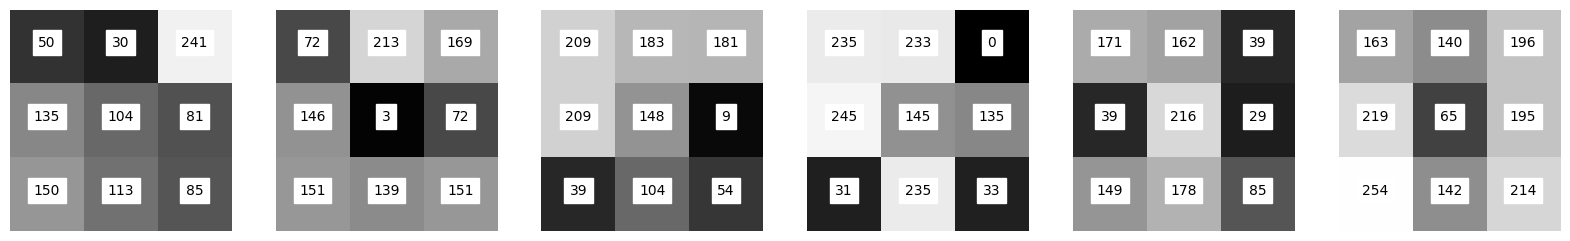

In [24]:
plot_filter_coefs('Conv1', model)

In [26]:
weights = model.get_layer('Conv1').get_weights()

In [27]:
weights[0][:,:,0,0] = np.array([[0, 0, 0], [0 , 1,  0], [0, 0, 0]])
weights[0][:,:,0,1] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
weights[0][:,:,0,2] = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
weights[0][:,:,0,3] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]]).T
weights[0][:,:,0,4] = np.array([[-1,-1, 0], [-1 , 0,  1], [0, 1, 1]])
weights[0][:,:,0,5] = np.array([[1 , 1,  1], [1, 1, 1], [1, 1, 1]])

# Normalizo
weights[0] = weights[0]/np.sqrt((weights[0]*weights[0]).sum(axis=0).sum(axis=0))
model.get_layer('Conv1').set_weights(weights)

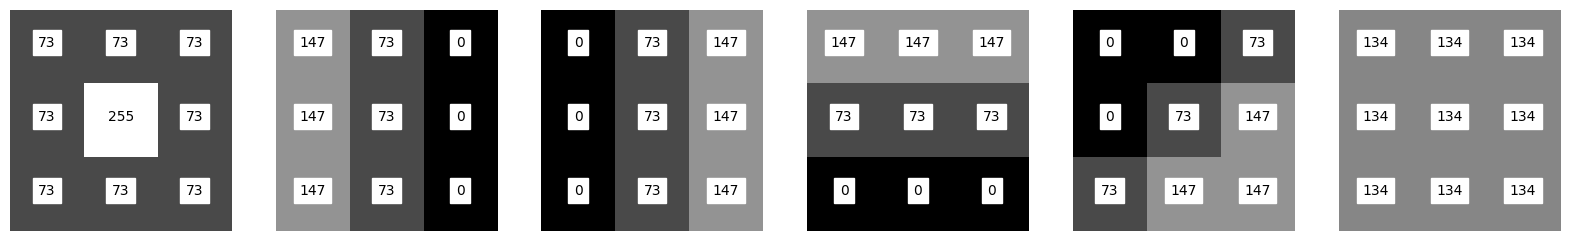

In [28]:
plot_filter_coefs('Conv1', model, normalize=True)

In [29]:
images_to_filter = np.load('images_to_filter.npy')
print(images_to_filter.shape)
activations_conv1_output = model.predict(images_to_filter)
print(activations_conv1_output.shape)

(5, 28, 28, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step
(5, 26, 26, 6)


# Sin función de activación

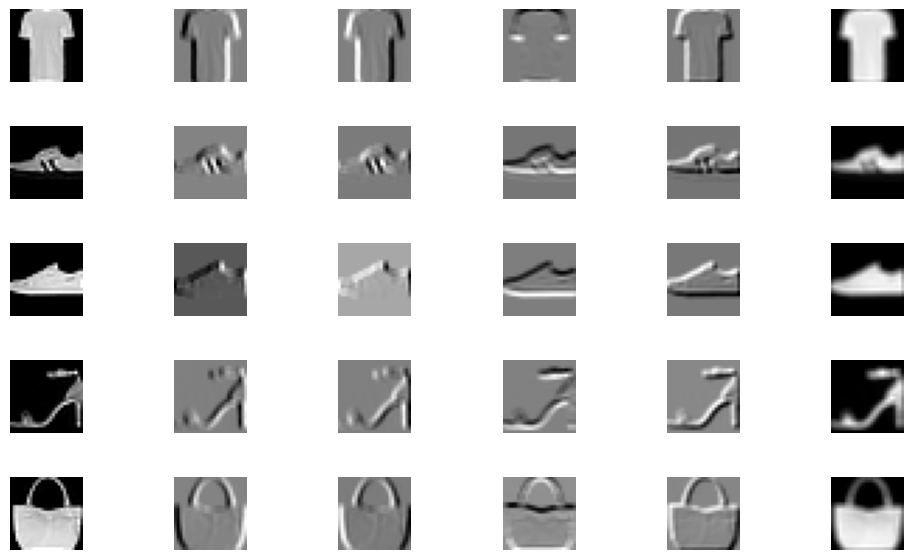

In [30]:
plot_activations(activations_conv1_output)

# Con Relu

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


/Users/julian/opt/anaconda3/envs/cnns/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


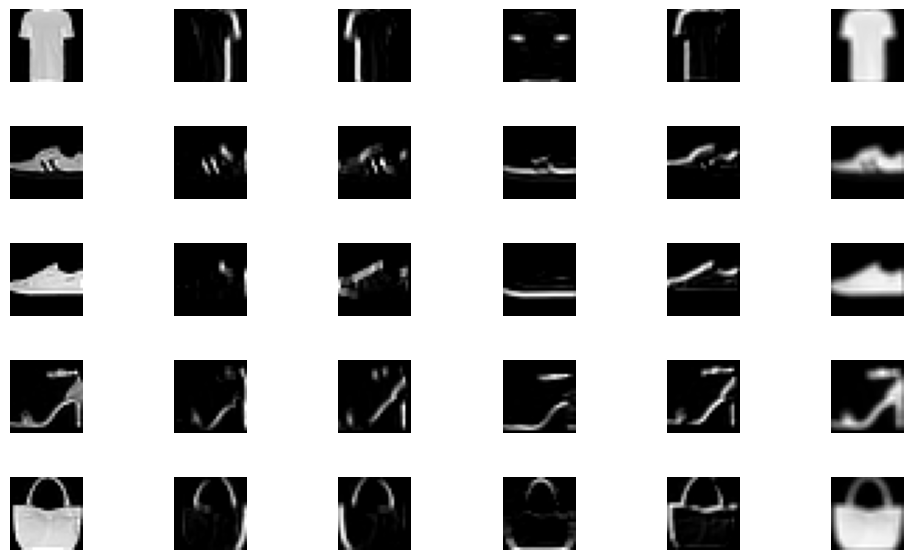

In [31]:
model_relu = get_simple_model('relu')
model_relu.set_weights(weights)
activations_output_relu = model_relu.predict(images_to_filter)
plot_activations(activations_output_relu)

# Con sigmoidea

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


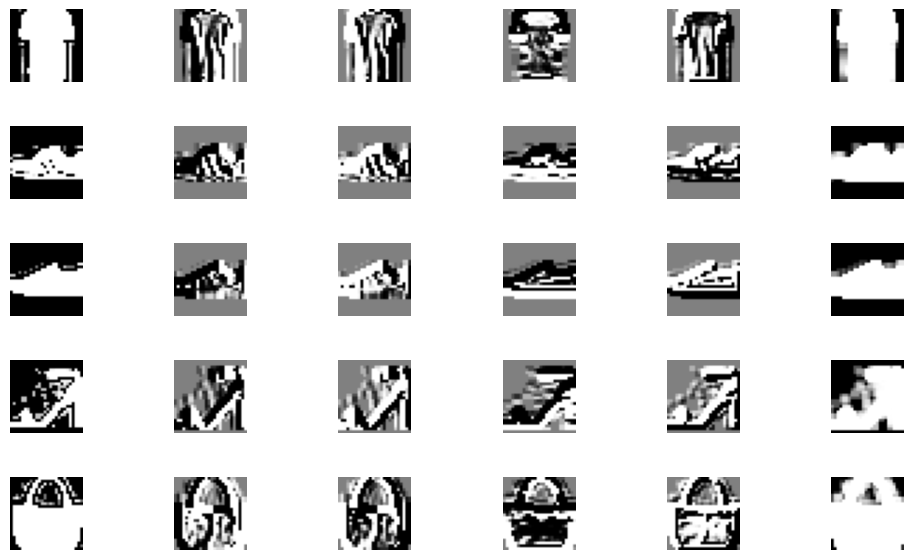

In [32]:
model_sigmoid = get_simple_model('sigmoid')
model_sigmoid.set_weights(weights)
activations_output_sigmoid = model_sigmoid.predict(images_to_filter)
plot_activations(activations_output_sigmoid)

# Sigmoidea normalizando

In [33]:
images_to_filter.max(), images_to_filter.min()

(255, 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


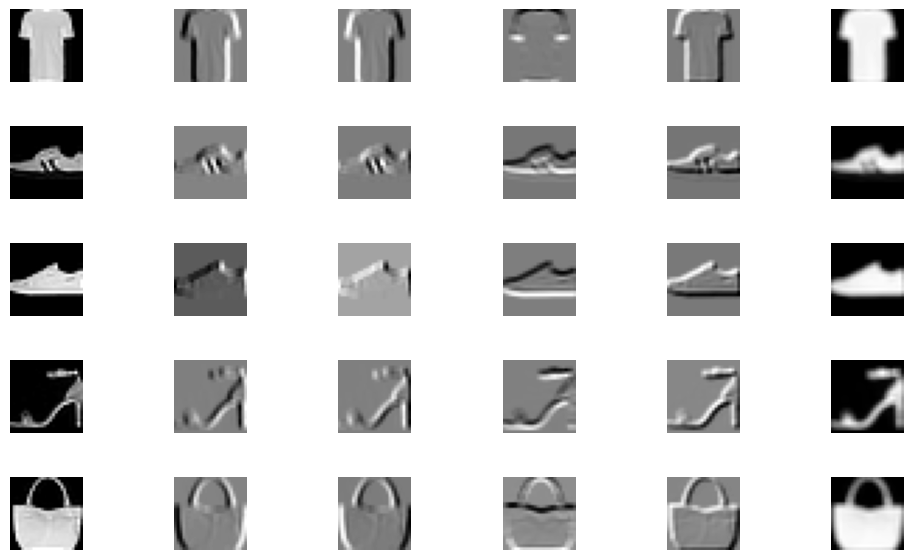

In [34]:
model_sigmoid_2 = get_simple_model('sigmoid')
model_sigmoid_2.set_weights(weights)
activations_output_sigmoid = model_sigmoid_2.predict(images_to_filter/256)
plot_activations(activations_output_sigmoid)

# Imagenes grandes con capa densa

In [35]:
model = Sequential()
model.add(Dense(100, input_shape=(None,500*375)))
model.add(Dense(5, input_shape=(None,500*375)))
model.summary()

/Users/julian/opt/anaconda3/envs/cnns/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, None, 100)      │    18,750,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, None, 5)        │           505 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,750,605 (71.53 MB)

 Trainable params: 18,750,605 (71.53 MB)

 Non-trainable params: 0 (0.00 B)

## Capa Pooling
### MaxPooling
**Su función es reducir la cantidad de parámetros, bajar la dimensionalidad**

Max Pooling
![Max-polling.png](imgs/Max-polling.png)

#### Hyperparámetros
MaxPooling
- Pool size
- Strides: En este caso está en None por default lo que significa que strides=pool_size

#### En [keras](https://keras.io/layers/pooling/)

In [36]:
from tensorflow.keras.layers import MaxPooling2D

In [37]:
model = Sequential()
model.add(MaxPooling2D(pool_size=(2,2), strides=None, padding='same', input_shape=(32,32,1)))
model.summary()

/Users/julian/opt/anaconda3/envs/cnns/lib/python3.9/site-packages/keras/src/layers/pooling/base_pooling.py:23: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(name=name, **kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Hacer pruebas y explicar 'Output Shape' y 'Param #':
- pool_size=(2,2), strides=None, padding='same'
- pool_size=(4,2), strides=None, padding='same'
- pool_size=(3,3), strides=None, padding='same'
- pool_size=(3,3), strides=None, padding='valid'


In [38]:
def get_simple_model_pool(activation = None, n_filters = 6, input_shape=(28,28,1)):
    model = Sequential()
    model.add(Convolution2D(filters=n_filters, 
                            kernel_size=3, 
                            input_shape=input_shape, 
                            name = 'Conv1',
                            padding= 'valid',
                            activation=activation
                           ))
    model.add(MaxPooling2D(3))
    return model

In [39]:
model_pool = get_simple_model_pool(activation='relu')

In [40]:
model_pool.get_layer('Conv1').set_weights(weights)

In [41]:
activations_pool_output = model_pool.predict(images_to_filter)
print(activations_pool_output.shape)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
(5, 8, 8, 6)


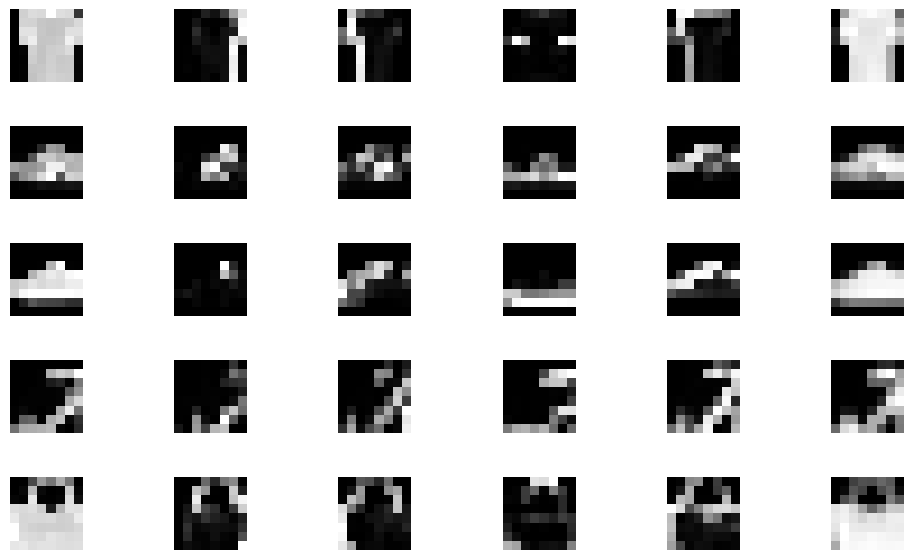

In [42]:
plot_activations(activations_pool_output)

### Global Average Pooling  
- Un resultado(Promedio) por cada canal
- Utilizada para reducir la dimensionalidad en las ultimas capas
![GAP.png](imgs/GAP.png)

#### En [keras](https://keras.io/layers/pooling/)

In [43]:
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten

In [44]:
model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(32,32,20)))
model.summary()

/Users/julian/opt/anaconda3/envs/cnns/lib/python3.9/site-packages/keras/src/layers/pooling/base_global_pooling.py:12: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ global_average_pooling2d_1      │ (None, 20)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

### AveragePooling

In [45]:
from tensorflow.keras.layers import AveragePooling2D

In [46]:
model = Sequential()
model.add(AveragePooling2D(4, 4, input_shape=(32,32,20)))
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ average_pooling2d               │ (None, 8, 8, 20)       │             0 │
│ (AveragePooling2D)              │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Preguntas:

- Como cierro la red? Que utlilzar? GAP o DENSA?
- Que implica hacer mas grande o mas pequeño el filtro?

# Armamos la red AlexNet:

### AlexNet [(paper)](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)
- 2012 
- Error de top-5 de 15.3%, más de 10.8% arriba del segundo. 
- ImageNet: En 1.2 millones de imágenes de alta resolución, 1000 clases
- Diseñada por: SuperVision group, consisting of Alex Krizhevsky, Geoffrey Hinton, and Ilya Sutskever.

**Lo novedoso**: Dropout, RELUs
(Dropout a la salida de las capas de 2048)

**Arquitectura:**
- Rectangulares con center-crop (Lado mas corto 256)
- 60 millones de parámetros
- 650 mil neuronas
- 5 capas convolucionales
- Algunos seguidos de capas pooling
- 3 capas densas
- SoftMax de 1000 categorias (1000 neuronas a la salida)
- RELUs en vez de Sigmoideas
- Dropout para evitar regularización

**Entrenamiento:**
- CUDA para soporte de GPU
- Data augmentation
- SGD
- Batch size = 128
- Momentum 0.9
- Learning rate = 0.01
- weight decay of 0.0005 (equivalente a L2 regularization)
- 5 a 6 días de entrenamiento en 2 [GTX 580](https://www.geforce.com/hardware/desktop-gpus/geforce-gtx-580) 3GB GPUs

![alexnet2.png](imgs/alexnet2.png)

# Armarla con Keras:

In [47]:
from solutions import get_alexnet

In [48]:
from tensorflow.keras.layers import Dropout

In [49]:
alexnet_model = Sequential()
alexnet_model.add(Convolution2D(filters=96, kernel_size=11, strides=4,
                                input_shape=(227,227,3), 
                                padding='valid', activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size = 3, strides=2))
alexnet_model.add(Convolution2D(filters=256, kernel_size=5, padding='same', activation='relu'))
alexnet_model.add(MaxPooling2D(pool_size = 3, strides=2))
alexnet_model.add(Convolution2D(filters=384, kernel_size=3, padding='same', activation='relu'))
alexnet_model.add(Convolution2D(filters=384, kernel_size=3, padding='same', activation='relu'))
alexnet_model.add(Convolution2D(filters=256, strides=2, kernel_size=3, padding='valid', activation='relu'))
alexnet_model.add(Flatten())
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(4096, activation='relu'))
alexnet_model.add(Dropout(0.5))
alexnet_model.add(Dense(1000, activation='softmax'))
alexnet_model.summary()

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 55, 55, 96)     │        34,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 27, 27, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 27, 27, 256)    │       614,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 384)    │       885,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 384)    │     1,327,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 6, 6, 256)      │       884,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4096)           │    37,752,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,378,344 (237.95 MB)

 Trainable params: 62,378,344 (237.95 MB)

 Non-trainable params: 0 (0.00 B)

## Reemplazo de FC por Convolucionales e implementación de sliding window eficiente

Supongamos que tengo una entrada de 5x5. Si hago flatten para poner una FC, me queda una entrada de 25x1.  
La cantidad de parámetros a aprender suponiendo que tengo una salida con 4 neuronas es:  
25*4 + 4 = 104

In [50]:
from tensorflow.keras.layers import Dense
model_dense = Sequential()
model_dense.add(Dense(4, input_shape=(25,)))
model_dense.summary()

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 4)              │           104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104 (416.00 B)

 Trainable params: 104 (416.00 B)

 Non-trainable params: 0 (0.00 B)

Si utilizo una convolucional con la misma entrada que salida, para tener la misma cantidad de parámetros, tengo que poner el tamaño del filtro igual a la entrada: 5x5  
Y la cantidad de filtros igual a la salida

In [51]:
model_slide = Sequential()
model_slide.add(Convolution2D(filters= 4, kernel_size=5, input_shape=(5,5,1)))
model_slide.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 1, 1, 4)        │           104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104 (416.00 B)

 Trainable params: 104 (416.00 B)

 Non-trainable params: 0 (0.00 B)

Que pasa si aumento la entrada:

In [52]:
width = 20
height = width
model_slide = Sequential()
model_slide.add(Convolution2D(filters=4, kernel_size=5, input_shape=(height,width,1)))
model_slide.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 4)      │           104 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104 (416.00 B)

 Trainable params: 104 (416.00 B)

 Non-trainable params: 0 (0.00 B)

![](imgs/sliding-wind-implem.png)

<pre>Layer         kernel  stride  output shape
---------------------------------------------
Input                          (416, 416, 3)
Convolution    3×3      1      (416, 416, 16)
MaxPooling     2×2      2      (208, 208, 16)
Convolution    3×3      1      (208, 208, 32)
MaxPooling     2×2      2      (104, 104, 32)
Convolution    3×3      1      (104, 104, 64)
MaxPooling     2×2      2      (52, 52, 64)
Convolution    3×3      1      (52, 52, 128)
MaxPooling     2×2      2      (26, 26, 128)
Convolution    3×3      1      (26, 26, 256)
MaxPooling     2×2      2      (13, 13, 256)
Convolution    3×3      1      (13, 13, 512)
MaxPooling     2×2      1      (13, 13, 512)
Convolution    3×3      1      (13, 13, 1024)
Convolution    3×3      1      (13, 13, 1024)
Convolution    1×1      1      (13, 13, 125)
</pre>